This Python script investigates how scaling the inputs to the softmax function impacts the distribution of the softmax activations.

The `LanguageModel` class is defined to create the neural network. It uses embedding layers for input words, a series of hidden layers (with Tanh activation), and an output layer. The forward pass method, `forward_with_softmax_and_scaling`, computes the softmax probabilities. Here, a scaling factor is applied to the network's output just before the softmax function, allowing experimentation with different scaling values.

The model is initialized with specific parameters like vocabulary size, embedding size, hidden size, context size, and the number of layers. A dummy input is created to simulate a batch of data.

The script runs the model thrice with different scaling factors (1.0, 0.1, and 0.05) applied before the softmax function. For each run, it captures the softmax probabilities and computes their variances.

Finally, the script visualizes the distributions of softmax activations for each scaling factor using histograms. This visualization helps in understanding how different scaling factors affect the spread and peak of the softmax activation values. The histograms are saved as a figure, providing a visual comparison of the impact of scaling on softmax activations. This analysis is essential in neural network initialization, as it can influence the learning process by affecting how weights are updated during training.

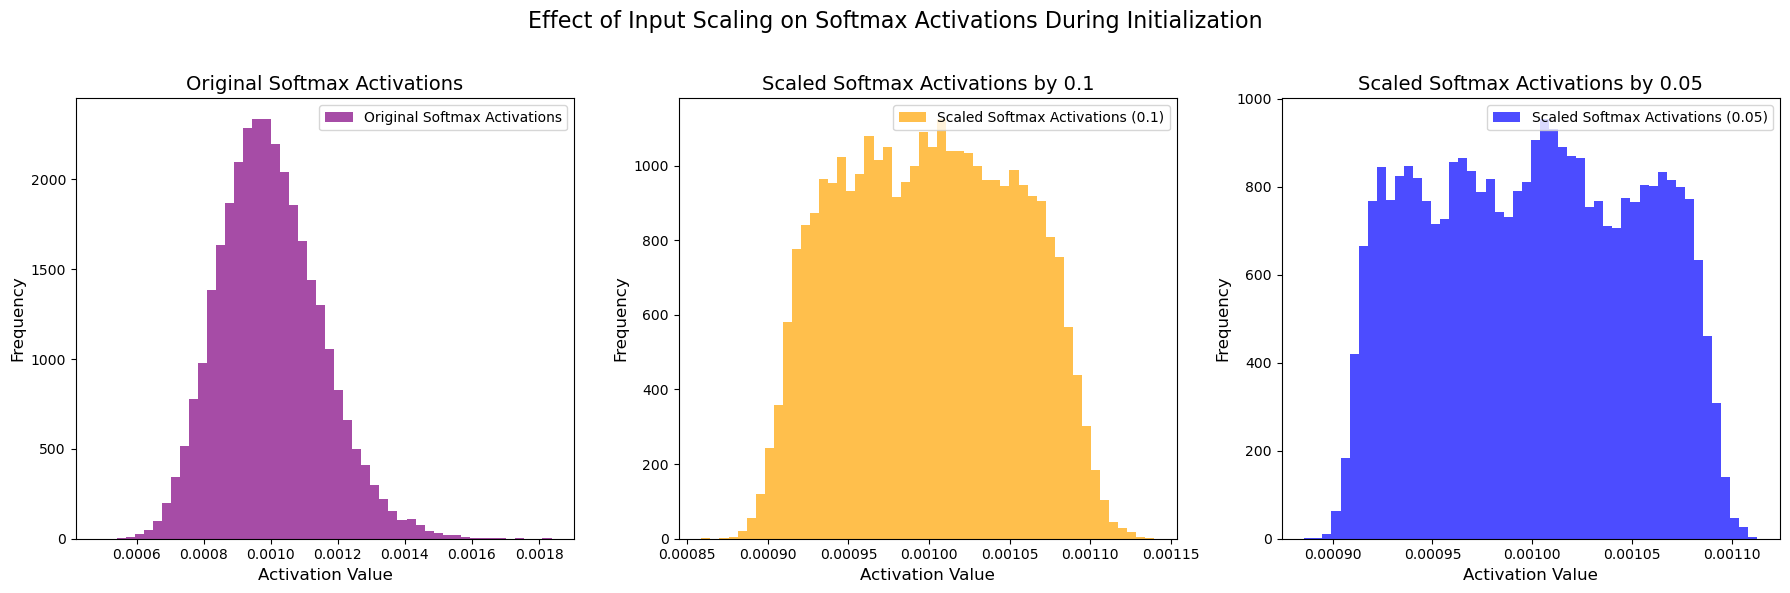

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Define the LanguageModel class
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, context_size, numberOfLayers):
        super(LanguageModel, self).__init__()
        self.embed_size = embed_size
        self.context_size = context_size
        self.hidden_size = hidden_size
        self.numberOfLayers = numberOfLayers
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.hidden_layers = nn.ModuleList()

        for i in range(self.numberOfLayers):
            linear_layer = nn.Linear((self.context_size) * self.embed_size if i == 0 else self.hidden_size, self.hidden_size)
            tanh_layer = nn.Tanh()
            self.hidden_layers.append(nn.Sequential(
                linear_layer,
                tanh_layer
            ))

        self.output_layer = nn.Linear(self.hidden_size, self.vocab_size)

    def forward_with_softmax_and_scaling(self, x, scale_factor=1.0):
        x = self.embedding(x)
        x = x.view(x.size(0), -1)
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
        x *= scale_factor  # Scale the input to the output layer
        y = self.output_layer(x)
        softmax_probs = F.softmax(y, dim=1)
        return softmax_probs

# Initialize the model with vocab_size = 1000
vocab_size = 1000
embed_size = 300
hidden_size = 128
context_size = 5
numberOfLayers = 2

model = LanguageModel(vocab_size, embed_size, hidden_size, context_size, numberOfLayers)

# Create new dummy input with vocab_size = 1000
batch_size = 32
dummy_input = torch.randint(0, vocab_size, (batch_size, context_size))

# Forward propagate to get the original softmax activations
softmax_probs_original = model.forward_with_softmax_and_scaling(dummy_input, scale_factor=1.0).detach().numpy()

# Forward propagate to get the scaled softmax activations
softmax_probs_scaled = model.forward_with_softmax_and_scaling(dummy_input, scale_factor=0.1).detach().numpy()

#
# Forward propagate to get the softmax activations scaled by 0.05
softmax_probs_scaled_005 = model.forward_with_softmax_and_scaling(dummy_input, scale_factor=0.05).detach().numpy()

# Calculate variances
var_original = np.var(softmax_probs_original)
var_scaled = np.var(softmax_probs_scaled)
var_scaled_005 = np.var(softmax_probs_scaled_005)

# Revised Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original activations
axs[0].hist(softmax_probs_original.flatten(), bins=50, color='purple', alpha=0.7, label=f'Original Softmax Activations')
axs[0].set_title('Original Softmax Activations', fontsize=14)
axs[0].set_xlabel('Activation Value', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].legend()

# Scaled activations by 0.1
axs[1].hist(softmax_probs_scaled.flatten(), bins=50, color='orange', alpha=0.7, label=f'Scaled Softmax Activations (0.1)')
axs[1].set_title('Scaled Softmax Activations by 0.1', fontsize=14)
axs[1].set_xlabel('Activation Value', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].legend()

# Scaled activations by 0.05
axs[2].hist(softmax_probs_scaled_005.flatten(), bins=50, color='blue', alpha=0.7, label=f'Scaled Softmax Activations (0.05)')
axs[2].set_title('Scaled Softmax Activations by 0.05', fontsize=14)
axs[2].set_xlabel('Activation Value', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)
axs[2].legend()

# Overall title and layout adjustments
plt.suptitle('Effect of Input Scaling on Softmax Activations During Initialization', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()



In [ ]:
# Save the plot
fig.savefig("softmax_activations_initialization.png")